# Homework 1 - data validation & cleaning 

In short, the main task is to clean The Metropolitan Museum of Art Open Access dataset.
  
> The instructions are not given in detail: It is up to you to come up with ideas on how to fulfill the particular tasks as best as possible!

However, we **strongly recommend and require** the following:
* Follow the assignment step by step. Number each step.
* Most steps contain the number of features that should be treated. You can preprocess more features. However, it does not mean the teacher will give you more points. Focus on quality, not quantity.
* Properly comment on all your steps. Use Markdown cells and visualizations. Comments are evaluated for 2 points of the total, together with the final presentation of the solution. However, it is not desirable to write novels! 
* This task is timewise and computationally intensive. Do not leave it to the last minute.
* Hand in a notebook that has already been run (i.e., do not delete outputs before handing in).

## What are you supposed to do:

  1. Download the dataset MetObjects.csv from the repository https://github.com/metmuseum/openaccess/. +++
  1. Check consistency (i.e., that the same things are represented in the same way) of at least **three features** where you expect problems (including the "Object Name" feature). You can propose how to clean the selected features. However, **do not apply cleaning** (in your interest) 🙂 _(1.5 points)_ +++
  1. Select at least **two features** (i.e., one couple) where you expect integrity problems (describe your choice) and check the integrity of those features. By integrity, we mean correct logical relations between features (e.g., female names for females only). _(2 points)_ +++
  1. Convert at least **five features** to a proper data type. Choose at least one numeric, one categorical (i.e., ordinal or nominal), and one datetime. _(1.5 points)_ +++
  1. Find some outliers and describe your method. _(3 points, depends on creativity)_+++
  1. Detect missing data in at least **three features**, convert them to a proper representation (if they are already not), and impute missing values in at least **one feature** using some imputation method (i.e., imputation by mean or median is too trivial to obtain any points). _(2 + 3 points, depends on creativity)_
  1. Focus more precisely on cleaning the "Medium" feature. As if you were to use it in the KNN classification algorithm later. _(3 points)_
  1. Focus on the extraction of the physical dimensions of each item (width, depth, and height in centimeters) from the "Dimensions" feature. _(2 points)_
  
All your steps, your choices of methods, and the following code **must be commented on!** For text comments (discussion, etc., not code comments), use **Markdown cells**. Comments are evaluated for 2 points together with the final presentation of the solution. 

**If you do all this properly, you will obtain 20 points.**

### **Initialization**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re

In [2]:
df = pd.read_csv('MetObjects.csv', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484956 entries, 0 to 484955
Data columns (total 54 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Object Number            484956 non-null  object 
 1   Is Highlight             484956 non-null  bool   
 2   Is Timeline Work         484956 non-null  bool   
 3   Is Public Domain         484956 non-null  bool   
 4   Object ID                484956 non-null  int64  
 5   Gallery Number           49541 non-null   object 
 6   Department               484956 non-null  object 
 7   AccessionYear            481094 non-null  object 
 8   Object Name              482690 non-null  object 
 9   Title                    456153 non-null  object 
 10  Culture                  208190 non-null  object 
 11  Period                   91143 non-null   object 
 12  Dynasty                  23201 non-null   object 
 13  Reign                    11236 non-null   object 
 14  Port

In [4]:
df.describe()

,Object ID,Object Begin Date,Object End Date,Metadata Date
count,484956.000000,484956.000000,484956.000000,0.0
mean,394499.940353,1303.913734,1402.978142,NaN
std,242732.561637,1710.259182,1132.101347,NaN
min,1.000000,-400000.000000,-240000.000000,NaN
25%,212379.750000,1535.000000,1593.000000,NaN
50%,374771.500000,1800.000000,1840.000000,NaN
75%,570971.250000,1891.000000,1905.000000,NaN
max,900748.000000,5000.000000,2870.000000,NaN


In [5]:
df.head()

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,...,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
0,1979.486.1,False,False,False,1,NaN,The American Wing,1979,Coin,One-dollar Liberty Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
1,1980.264.5,False,False,False,2,NaN,The American Wing,1980,Coin,Ten-dollar Liberty Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
2,67.265.9,False,False,False,3,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/3,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
3,67.265.10,False,False,False,4,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/4,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
4,67.265.11,False,False,False,5,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/5,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN


### **Consistency check**

##### **Object Name**

In [6]:
df['Object Name'].nunique()

28631

In [7]:
df['Object Name'].str.lower().nunique()

27760

It is seen now that some values in `Object Name` column only differ due to capitalization

In [8]:
sorted(df['Object Name'].dropna().unique())[:200]

['"Autophone" Organette',
 '"Basso"',
 '"Chanot Model" Violin',
 '"Humantone" Nose Flute',
 '"Japanese Fiddle"',
 '"Ladies in Blue" Fresco',
 '"Musical Ball" ("Return Ball")',
 '"New Year\'s Bottle" with cow goddess Nebethetepet',
 '"Persian" Sitar',
 '"Russian Bassoon" (Bass Horn)',
 '"Savart model" Violin',
 '"Shield frieze" Fresco',
 '"Tea-pot"',
 '"Zobo Flute" (Kazoo)',
 '"Zobo Horn" (Kazoo)',
 "'Uganda Drum'",
 "'Uli'Uli",
 "'Ássa' dád eestl 'ónígíí",
 '(Back?) pillar or stela, first cartouche of the Aten',
 ', uninscribed scarab',
 '1 round half bead',
 '10 beads',
 '11 spacers',
 '12 textile samples',
 '13 bead fragments',
 '13 textile samples',
 '136 plaster impressions',
 '14 textile samples',
 '16 Litra piece',
 '16 textile samples',
 '17 textile samples',
 '18 textile samples',
 '19 textile samples',
 '2 Ball beads',
 '2 Barrel-shaped beads',
 '2 Lotus flower pendants',
 '2 Swords (Dha) with scabbard',
 '2 cowrie shells',
 '2 cylindrical beads',
 '2 drop pendants',
 '20 numm

From these first 200 records we can see that main problems include:
- Extra spaces
- Alternation of use of 'and' and '&'
- Spelling mistakes
- Unexpected signs (e.g., '?)

##### **Gallery Number**

In [9]:
df['Gallery Number'].dropna().unique()

array(['774', '706', '724', '741', '728', '719', '718', '729', '712',
       '516', '737', '738', '701', '734', '708', '722', '713', '730',
       '752', '736', '714', '740', '743', '725', '739', '745', '700',
       '704', '750', '512', '751', '717', '749', '733', '773', '710',
       '744', '726', '705', '732', '731', '723', '715', '508', '510',
       '747', '756', '720', '721', '766', '761', '762', '754', '372',
       '554', '707', '764', '768', '771', '760', '758', '759', '763',
       '681', '824', '769', '748', '753', '772', '755', 'in Great Hall',
       '767', '770', '765', '703', '809', '735', '727', '599', '742',
       '757', '380', '378', '371', '379', '375', '374', '376', '373',
       '455', '377', '370', '459', '509', '457', '307', '303', '304',
       '306', '014', '503', '010', '544', '301', '002', '305', '216',
       '236', '222', '207', '208', '223', '210', '213', '230', '214',
       '251', '244', '235', '237', '247', '249', '248', '250', '204',
       '238', '25

From these records we can see that values in 'Gallery Number' column have some problems:
- Numbers represented with both floats and integers
- Strings representing some kind of name/address, not number of gallery, as the name suggests

##### **City**

In [10]:
df['City'].nunique()

2622

In [11]:
df['City'].str.lower().nunique()

2611

In [12]:
sorted(df['City'].dropna().unique())[:200]

['Aachen',
 'Aarau',
 'Abeokuta region',
 'Abeokuta region (?)',
 'Abeokuta region, Itoko quarter',
 'Abingdon',
 'Abomey',
 'Absam',
 'Abu Mena',
 'Aceh',
 'Acton',
 'Adorf',
 'Agani village',
 'Agen',
 'Agirigi region',
 'Agra',
 'Agwa or Ogbaku region',
 'Ahmadabad',
 'Ahmedabad',
 'Ahmedabad|New York',
 'Ahnas',
 'Aibom village',
 'Ain et-Turba',
 'Aitape (?)',
 'Aix',
 'Ajmer',
 'Aketa village',
 'Akhmim (former Panopolis)',
 'Akhmin',
 'Akpa or Upu village',
 'Akron',
 'Akwa region',
 'Akwete',
 'Albany',
 'Albany|Kingston',
 'Albany|New York',
 'Alcala',
 "Alcala' de Henares",
 'Alençon',
 'Alexandria',
 'Alexandria|Washington DC',
 'Alford',
 'Alfred',
 'Alfred|Marblehead',
 'Algiers',
 'Allegheny',
 'Allentown',
 'Allgäu',
 'Alloway',
 'Allowaystown',
 'Almeria',
 'Altenberg-an-der-Lahn',
 'Altona',
 'Amalfi',
 'Amanamkai village',
 'Amberley',
 'Ambisu or Amanamkai village',
 'Ambisu village',
 'Ambonwari village',
 'Amehta',
 'Amesbury',
 'Amherst',
 'Amiens',
 'Amiens (?)',

From these records, we can see that values in the 'City' column have some inconsistencies:

- 11 row values differ only due to capitalization
- Spelling varies (e.g., 'Ahmadabad' and 'Ahmedabad')
- Unexpected symbols (e.g., '?')

##### **Country**

In [13]:
df[(df['City'] == 'London') & (df['Country'] != 'UK')]['Country'].unique()

array(['England', nan, 'United Kingdom', 'Canada'], dtype=object)

We can see that "The United Kingdom" is marked as both "UK" and "United Kingdom" in this dataset. Sometimes, the country where London belongs is even marked as "England."

In [14]:
df[(df['City'] == 'New York') & (df['Country'] != 'USA')]['Country'].unique()

array(['United States', 'United States|United States',
       'United States|France|Tibet', nan, 'U.S.A.', 'America',
       'United States of America', 'Unitted States'], dtype=object)

Same problem is noticable for USA, being marked as "U.S.A", "United States", "United States of America" and even "Unitted States" with a spelling mistake

##### **How can we clean this data?**
- Convert all string values to lowercase or title case.
- Remove unexpected signs
- For 'Gallery Number' replace float values with ints and remove/replace string values with correct ones

### **Integrity problems**

One thing I want to check for sure is integrity in dates, so that 'Object End Date' is always greater or equal to 'Object Begin Date'

In [15]:
((df['Object End Date'] - df['Object Begin Date']).dropna() < 0).sum() 

np.int64(205)

We can see that 205 rows do not fulfill this requirement, meaning that in these rows, the Object Begin Date is later than the Object End Date. This inconsistency might be caused by an accidental switching of columns or other errors.

### **Data type convertion**

Converting features to datetime

In [16]:
df['Object Begin Date'] = pd.to_datetime(df['Object Begin Date'])
df['Object End Date'] = pd.to_datetime(df['Object End Date'])
df['Object Date'] = pd.to_datetime(df['Object Date'], errors='coerce')

Converting features to numeric

In [17]:
df['Gallery Number'] = pd.to_numeric(df['Gallery Number'], errors='coerce')

Converting features to categorical

In [18]:
df['Artist Gender'] = pd.Categorical(df['Artist Gender'])

### **Finding outliers**

I will convert the begin date to numeric value, as it allows to use Quartiles to find outliers

In [19]:
df['Object Begin Date'] = pd.to_numeric(df['Object Begin Date'])

The method used for finding outliers in your data is based on the Interquartile Range (IQR), which is a statistical technique commonly used for detecting outliers in numerical data

In [20]:
Q1 = df['Object Begin Date'].quantile(0.25)
Q3 = df['Object Begin Date'].quantile(0.75)
IQR = Q3 - Q1
outliers = (df['Object Begin Date'] > Q3 + 1.5*IQR) | (df['Object Begin Date'] < Q1 - 1.5*IQR)

In [21]:
df[outliers]['Object Begin Date'].sort_values(ascending=False).tail(15)

366417    -90000
366418    -90000
347942    -90000
347944    -90000
347943    -90000
347937    -90000
366419    -90000
366420    -95000
364679   -240000
364680   -240000
364677   -240000
364684   -240000
364681   -240000
364683   -400000
364691   -400000
Name: Object Begin Date, dtype: int64

In [22]:
df[outliers]['Object Begin Date'].sort_values(ascending=False).head(15)

336969    5000
336740    5000
185796    1000
185795    1000
185794    1000
185793    1000
185792    1000
33434     1000
314285    1000
314297    1000
17881     1000
314298    1000
314299    1000
314300    1000
314301    1000
Name: Object Begin Date, dtype: int64

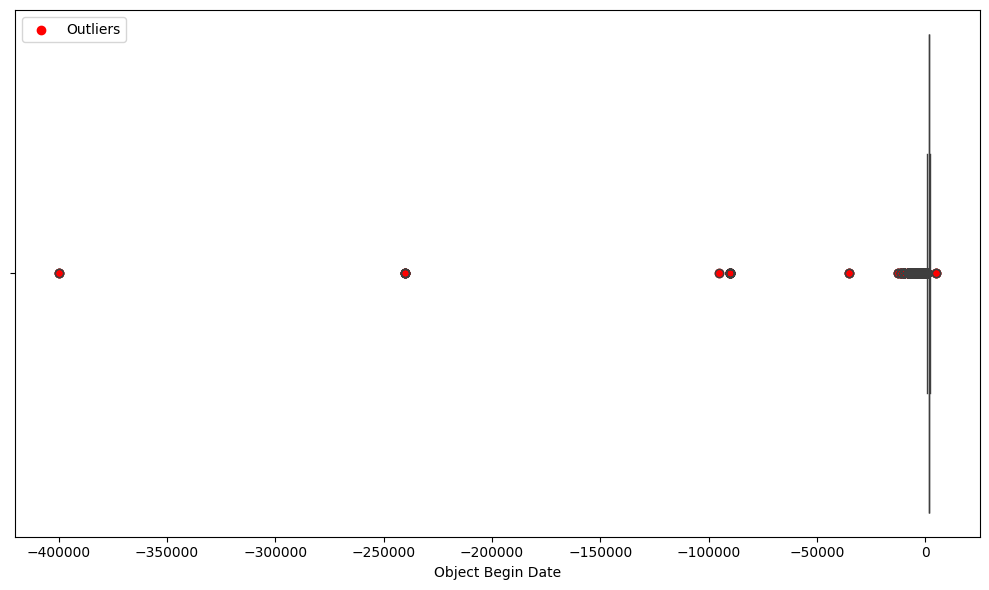

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Object Begin Date')
outliers_data = df[outliers]

plt.scatter(outliers_data['Object Begin Date'], [0] * len(outliers_data), color='red', label='Outliers')
plt.legend()
plt.tight_layout()

Converting it back to datetime

In [24]:
df['Object Begin Date'] = pd.to_datetime(df['Object Begin Date'])

### **Missing data**

##### **Object Begin/End Date**

In [25]:
df['Object Begin Date'].isnull().sum()

np.int64(0)

In [26]:
(df['Object End Date'] - df['Object Begin Date']).lt(pd.Timedelta(0)).sum()

np.int64(205)

In [27]:
df.loc[df['Object Begin Date'] > df['Object End Date'], 'Object End Date'] = np.nan

In [28]:
df['Object Begin Date'].unique()

<DatetimeArray>
['1970-01-01 00:00:00.000001853', '1970-01-01 00:00:00.000001901',
 '1970-01-01 00:00:00.000001909', '1970-01-01 00:00:00.000001912',
 '1970-01-01 00:00:00.000001907', '1970-01-01 00:00:00.000001876',
 '1970-01-01 00:00:00.000001910', '1970-01-01 00:00:00.000001665',
 '1970-01-01 00:00:00.000001800', '1970-01-01 00:00:00.000001867',
 ...
 '1970-01-01 00:00:00.000002017', '1970-01-01 00:00:00.000001311',
 '1970-01-01 00:00:00.000002018', '1970-01-01 00:00:00.000002019',
 '1969-12-31 23:59:59.999999565', '1970-01-01 00:00:00.000002020',
 '1970-01-01 00:00:00.000002021', '1970-01-01 00:00:00.000002022',
 '1969-12-31 23:59:59.999998624', '1970-01-01 00:00:00.000000021']
Length: 2076, dtype: datetime64[ns]

In [29]:
df.loc[df['Object Begin Date'].dt.year > datetime.now().year, 'Object Begin Date'] = np.nan
df.loc[df['Object End Date'].dt.year > datetime.now().year, 'Object End Date'] = np.nan

In [30]:
df['Object Begin Date'].isna().sum()

np.int64(0)

##### **Gender**

In [31]:
import gender_guesser.detector as gender

In [32]:
d = gender.Detector()

In [33]:
def clean_name(name):
    # Remove known prefixes or common special characters
    name = name.replace("Mr.", "").replace("Dr.", "").replace("|", " ").replace(",", " ").strip()
    return name

In [34]:
def get_gender(name):
    try:
        name = clean_name(name)
        gender = d.get_gender(name.split()[1])
        if gender == 'unknown' and len(name.split()) > 1:
            gender = d.get_gender(name.split()[2])
    except:    
        gender = d.get_gender(name)  
    if gender == 'mostly_female':
        gender = 'female'
    if gender == 'mostly_male':
        gender = 'male'
    if gender == 'andy':
        gender = 'unknown'       
    return gender

In [35]:
artist_columns = ["Artist Display Name", "Artist Alpha Sort", "Artist Display Bio", "Artist Nationality", "Artist Begin Date", "Artist End Date", "Artist Gender"]

In [36]:
artist_info = df[artist_columns].dropna().copy()

In [37]:
artist_info['Artist Gender Guess'] = artist_info['Artist Alpha Sort'].apply(get_gender)

In [51]:
artist_info.head(20)

,Artist Display Name,Artist Alpha Sort,Artist Display Bio,Artist Nationality,Artist Begin Date,Artist End Date,Artist Gender,Artist Gender Guess
34,Paulding Farnham|Tiffany & Co.,"Farnham, Paulding|Tiffany & Co.",1859–1927|1837–present,American|,1859 |1837,1927 |9999,|,female
111,Louis C. Tiffany|Tiffany Glass and Decorating ...,"Tiffany, Louis C.|Tiffany Glass and Decorating...","American, New York 1848–1933 New York|American...",American|American,1848 |1892,1933 |1902,|,male
112,Louis C. Tiffany|Tiffany Glass and Decorating ...,"Tiffany, Louis C.|Tiffany Glass and Decorating...","American, New York 1848–1933 New York|American...",American|American,1848 |1892,1933 |1902,|,male
203,Louis C. Tiffany|Tiffany Glass and Decorating ...,"Tiffany, Louis C.|Tiffany Glass and Decorating...","American, New York 1848–1933 New York|American...",American|American,1848 |1892,1933 |1902,|,male
204,Louis C. Tiffany|Tiffany Glass and Decorating ...,"Tiffany, Louis C.|Tiffany Glass and Decorating...","American, New York 1848–1933 New York|American...",American|American,1848 |1892,1933 |1902,|,male
220,John Henry Belter|J. H. Belter & Co.,"Belter, John Henry|J. H. Belter & Co.","American, born Germany 1804-1863 New York|1854...",American|,1804 |1854,1863 |1865,|,male
221,J. H. Belter & Co.|John Henry Belter,"J. H. Belter & Co.|Belter, John Henry","1854–1865|American, born Germany 1804-1863 New...",|American,1854 |1804,1865 |1863,|,unknown
241,Tiffany Studios|Agnes F. Northrop,"Tiffany Studios |Northrop, Agnes F.","1902–32|American, Flushing, New York 1857–1953...",|American,1902 |1857,1932 |1953,|Female,unknown
265,Winslow Brothers Company|Louis Henry Sullivan,"Winslow Brothers Company|Sullivan, Louis Henry","American, Chicago, Illinois|American, Boston, ...",American|American,|1856,|1924,|,unknown
266,Louis Henry Sullivan|Dankmar Adler,"Sullivan, Louis Henry|Adler, Dankmar","American, Boston, Massachusetts 1856–1924 Chic...",American|American,1856 |1844,1924 |1900,|,male


### **Cleaning the 'Medium' feature**

I will look at unique values to see what I have to replace or fill in

In [39]:
sorted(df['Medium'].dropna().unique())

['\r\n',
 '\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\nPen and black ink, watercolor and gouache with gum arabic and metallic ink',
 '\r\nBlue faience',
 '\r\nBrass or bronze',
 '\r\nCarnelian\r\nGold',
 '\r\nColor lithograph',
 '\r\nCopper-silver alloy (shibuichi), copper-gold alloy (shakudō), copper, gold, silver\r\n',
 '\r\nDiorite',
 '\r\nEngraving',
 '\r\nEtching, state i',
 '\r\nFaience, paint',
 '\r\nGraphite on tracing paper adhered to wove paper with perforated  linen tape adhered to left edge for binding, with graphite on tracing paper overlay.',
 '\r\nGraphite on tracing paper overlay with a graphite and tracing paper overlay.\r\n\r\n',
 '\r\nGraphite on tracing paper overlay.',
 '\r\nGraphite on tracing paper overlay.\r\n',
 '\r\nGraphite on tracing paper overlay.\r\n\r\n',
 '\r\nGraphite on tracing paper.',
 '\r\nGraphite on wove paper with perforated  linen tape adhered to left edge for binding.',
 '\r\nOverlay of red ink and  graphite on tracing p

In [40]:
medium_data = df['Medium']

Here is what I am going to do:

- Remove line breaks (\r\n)
- Replace commas with semicolons as delimiters
- Remove duplicate semicolons
- Strip leading and trailing spaces

In [41]:
df['Medium'] = df['Medium'].str.replace(r'\r\n', '', regex=True)
df['Medium'] = df['Medium'].str.replace(r'\s*,\s*', ', ', regex=True)
df["Medium"] = df["Medium"].str.replace(",", ";", regex=False)
df["Medium"] = df["Medium"].str.replace(r';+', ';', regex=True)
df['Medium'] = df['Medium'].str.strip()

And look at the result

In [42]:
sorted(df['Medium'].dropna().unique())

['',
 '"Chinese blue" barium copper silicate',
 '"False Jade"',
 '"False Jade(?) Limestone"',
 '"Hansford"',
 '"Porcelain painted in overglaze polychrome enamels (Bencharong ware for Thai market)',
 '"Porcelain painted in underglaze cobalt blue (Jingdezhen ware)',
 '"Smoky quartz" rock crystal; turquoise',
 '"Smoky" rock crystal',
 '"Soft paste" porcelain painted in underglaze blue',
 '"Soft paste" porcelain with incised decoration under glaze (Jingdezhen ware)',
 '"Soft-paste" porcelain painted in underglaze blue',
 '"Soft-paste" porcelain painted in underglaze blue.',
 '"Soft-paste" porcelain with cream -colored glaze.',
 '"Soft-paste" type porcelain painted in underglaze blue.',
 '"Spanish" topaz quartz',
 '"White–line" woodblock print; ink and color on paper',
 '#17 steel dressmaker pins',
 '(.1): lithograph(.2): lithograph(.3): lithograph(.4): graphite(.5): graphite(.6): graphite',
 '(Brown) glazed steatite',
 '(Corten) "Weathering" steel',
 '(Exterior) fudame ground enriched with

### **Dimensions extraction**

In [43]:
sorted(df['Dimensions'].dropna().unique())

['\tLength - long edge/short edge\t\t99.2/43.5 cm. (38.69 in./17.13 in.)\r\n\tBody width perpendicular to long edge:           \t46.8 cm. (18.25 in.)                       \r\n\tBody depth including molding:\t\t7.9 cm. (3.15 in.)\t    \r\n\tVibrating length of strings:\t\t80.5/30.0 cm (31.40 in./30 in.)\r\n\tDiameter of rosette:\t\t7.5 cm. (2.93 in.)\r\n\tLength of hammers:\t\tapp. 23.5 cm. (9.17 in.)',
 '\r\n',
 '\r\n\tInner Instrument\r\n\tL.\t195.2 cm \t76.85 in.     \r\n\tW.\t  85.9 \t33.82 \r\n\tD.\t  21.6\t  8.50\r\n\r\n\t',
 '\r\n\r\n',
 '\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n',
 '\r\n\r\nH. 29-3/8, W. 16 3/4, D. 7 in. \r\n\r\n',
 '\r\nH. 1 3/4", W. 13 1/8", D13 1/8"',
 '\r\nH. 3-3/4, W. 4-3/8 inches',
 '\r\nL. 0.013m',
 '\r\nL. 5 in. (12.7 cm)',
 '\r\nL. 7/16 in.',
 '\r\nNo.\tDiameter\tHeight\tWeight\r\n1\t189 mm\t82 mm\t702 g\r\n2\t189\t84.5\t830\r\n3\t192\t85\t665\r\n4\t194\t85.5\t801\r\n5\t197\t85.5\t8

In [44]:
df['Dimensions'] = df['Dimensions'].str.replace("\t", " ").str.replace("\r\n", " ")
df['Dimensions'] = df['Dimensions'].str.replace(";", ",").str.replace(":", ",")
df['Dimensions'] = df['Dimensions'].str.strip()

In [45]:
sorted(df['Dimensions'].dropna().unique())

['',
 '"A" dimensions confirmed, 16 ft. 9 3/4 in. × 20 3/4 in. (512.4 × 52.7 cm) "B" dimension confimed, 16 ft. 9 1/2 in. × 20 3/4 in. (511.8 × 52.7 cm) Historic dimensions, superceded, 21 ft. 10 in. (665.5 cm)',
 '"Longest pipe 25.4 cm (10 in.), Shortest pipe 6.4 cm (2-1/2 in.)", also written, "Longest tube 48.3 cm (1 ft. 7 in.), shortest tube 4.1 cm (1 ft. 5/8 in.)"',
 '"b" confirmed, 7 11/16 × 2 3/4 × 1/8 in. (19.5 × 7 × 0.3 cm)',
 '(.1) 4 9/16 x 2 1/2 in. (11.6 x 6.3 cm) (.2) 4 3/8 x 2 11/16 in. (11.1 x 6.9 cm) uneven (.3) 3 7/16 x 2 in. (8.8 x 5.1 cm) (.4) 3 3/4 x 3 3/16 in. (9.6 x 8.1 cm) (.5) 3 3/8 x 2 9/16 in. (8.5 x 6.5 cm) (.6) 3 9/16 x 3 1/8 in. (9 x 8 cm)',
 '(.1) H. 6-1/2, W. 6, D. 6-1/2 inches (16.5 x 15.2 x 16.5 cm.) (.2) H. 6-1/2, W. 6-1/2, D. 6-1/2 inches (16.5 x 16.5 x 16.5 cm.)',
 '(.1) confirmed, 12 9/16 × 8 7/16 × 8 7/16 in., 4.6 lb. (31.9 × 21.4 × 21.4 cm, 2.1 kg) (.2) confirmed, 12 7/16 × 8 7/16 × 8 7/16 in. (31.6 × 21.4 × 21.4 cm)',
 '(.1), H. 4 7/16 in. (11.2 c

The function `extract_dimensions` is used to extract physical dimensions from a given input. It checks for patterns that represent dimensions in formats such as "x x x cm", "x x cm", and "x cm". The function processes these patterns, converts the extracted values to float, and returns the dimensions in a list. If no valid dimensions are found, it returns pd.NA.

In [46]:
def extract_dimensions(text):
    if pd.isna(text):
        return pd.NA

    patterns = [
        r"(\d+(?:\.\d+)?)\s*[x×]\s*(\d+(?:\.\d+)?)\s*[x×]\s*(\d+(?:\.\d+)?)\s*cm",  # Match "x x x cm"
        r"(\d+(?:\.\d+)?)\s*[x×]\s*(\d+(?:\.\d+)?)\s*cm",                            # Match "x x cm"
        r"(\d+(?:\.\d+)?)\s*cm"                                                      # Match "x cm" (single dimension)
    ]

    for pattern in patterns:  
        matches = [match.groups() for match in re.finditer(pattern, text)]
        
        if matches:
            matches = [[float(num) for num in match] for match in matches]
            
            if pattern == r"(\d+(?:\.\d+)?)\s*cm" and len(matches) > 1:
                flattened_matches = [value[0] for value in matches]
                return flattened_matches[:3]
            
            return max(matches, key=sum)
    
    return pd.NA

In [47]:
df['Dimensions after'] = df['Dimensions'].apply(extract_dimensions)

In [48]:
df[['Dimensions after', 'Dimensions']].head(20)

,Dimensions after,Dimensions
0,<NA>,Dimensions unavailable
1,<NA>,Dimensions unavailable
2,[1.7],Diam. 11/16 in. (1.7 cm)
3,[1.7],Diam. 11/16 in. (1.7 cm)
4,[1.7],Diam. 11/16 in. (1.7 cm)
5,[1.7],Diam. 11/16 in. (1.7 cm)
6,[1.7],Diam. 11/16 in. (1.7 cm)
7,[1.7],Diam. 11/16 in. (1.7 cm)
8,[1.7],Diam. 11/16 in. (1.7 cm)
9,<NA>,Dimensions unavailable


In [49]:
df[['Dimension 1', 'Dimension 2', 'Dimension 3']] = df['Dimensions after'].apply(
    lambda x: pd.Series(x + [np.nan] * (3 - len(x)) if isinstance(x, list) else [np.nan, np.nan, np.nan]))

In [50]:
df[['Dimensions', 'Dimension 1', 'Dimension 2', 'Dimension 3']].head(20)

,Dimensions,Dimension 1,Dimension 2,Dimension 3
0,Dimensions unavailable,NaN,NaN,NaN
1,Dimensions unavailable,NaN,NaN,NaN
2,Diam. 11/16 in. (1.7 cm),1.7,NaN,NaN
3,Diam. 11/16 in. (1.7 cm),1.7,NaN,NaN
4,Diam. 11/16 in. (1.7 cm),1.7,NaN,NaN
5,Diam. 11/16 in. (1.7 cm),1.7,NaN,NaN
6,Diam. 11/16 in. (1.7 cm),1.7,NaN,NaN
7,Diam. 11/16 in. (1.7 cm),1.7,NaN,NaN
8,Diam. 11/16 in. (1.7 cm),1.7,NaN,NaN
9,Dimensions unavailable,NaN,NaN,NaN
